# Book Recommendation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
books = pd.read_csv('../dataset/Books.csv')
users = pd.read_csv('../dataset/Users.csv')
ratings = pd.read_csv('../dataset/Ratings.csv')

In [6]:
sns.set_theme(
    style="whitegrid",
    font_scale=1.3,
    palette=['#21918c',"#4C72B0"], 
    rc={
        "text.color": "black",
        "axes.labelcolor": "black",
        "xtick.color": "black",
        "ytick.color": "black"
    }
)
palette_colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B3"] 

In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [11]:
print(books.columns)
print(users.columns)
print(ratings.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [12]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [13]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [14]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [15]:
print(books.duplicated().sum())
print(users.duplicated().sum())
print(ratings.duplicated().sum())

0
0
0


In [16]:
def annotate_val_y(ax,fmt='.0f',gap=50):
    for p in ax.patches:
        width = p.get_width()
        y= p.get_y() +  p.get_height()/2

        ax.annotate(format(width,fmt),(width+gap,y), ha='left',va='center')

def annotate_val(ax,fmt='.0f'):
    for p in ax.patches:
        height = p.get_height()
        x= p.get_x() +  p.get_width()/2

        ax.annotate(format(height,fmt),(x,height), ha='center',va='bottom')

In [17]:
books1 = books.copy(deep=True)

In [18]:
books1['Year-Of-Publication'] = pd.to_numeric(books1['Year-Of-Publication'],errors='coerce').astype('Int64')

In [19]:
book_na_idx = books[books1['Year-Of-Publication'].isnull()].index

In [20]:
for i in book_na_idx :
    books.loc[i]['Year-Of-Publication'] , books.loc[i]['Book-Author'] = books.loc[i]['Book-Author'],books.loc[i]['Year-Of-Publication']

## Publishers with the Most Books

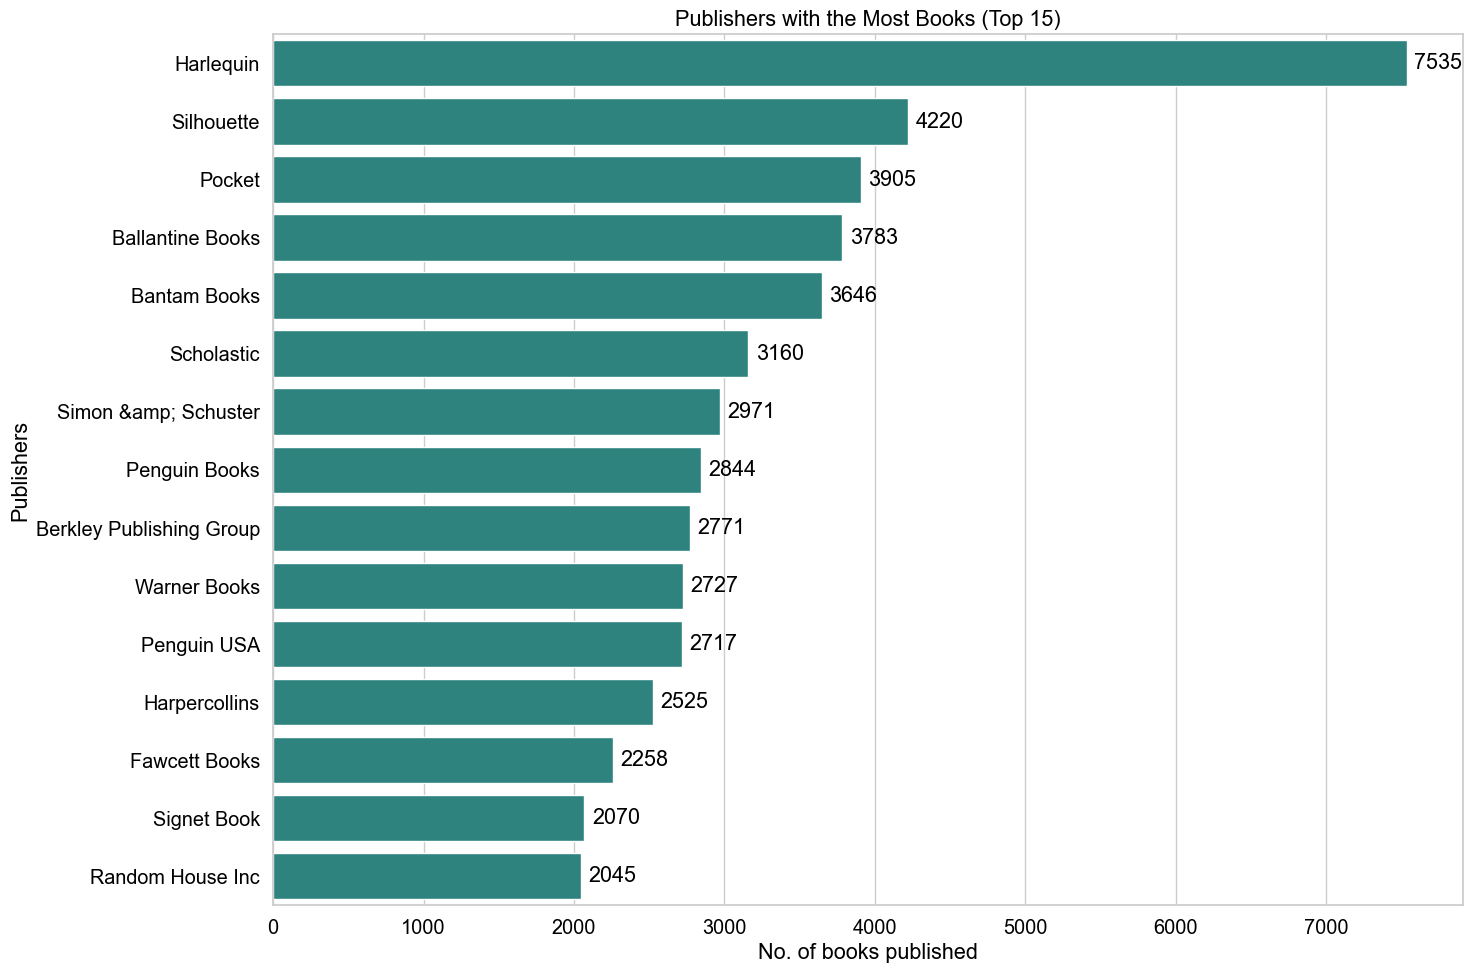

In [22]:
publisher = books['Publisher'].value_counts()[:15]
plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1)
sns.barplot(x=publisher.values,y=publisher.index,ax=ax)
annotate_val_y(ax)
plt.title('Publishers with the Most Books (Top 15)')
plt.xlabel('No. of books published')
plt.ylabel('Publishers') 
plt.tight_layout(h_pad=2)

plt.show()

- The publishers Harlequin, Silhouette, and Pocket have published the highest number of books in the dataset.
- These publishers appear to dominate the book market in terms of volume of publications.

## Authors with the most Books

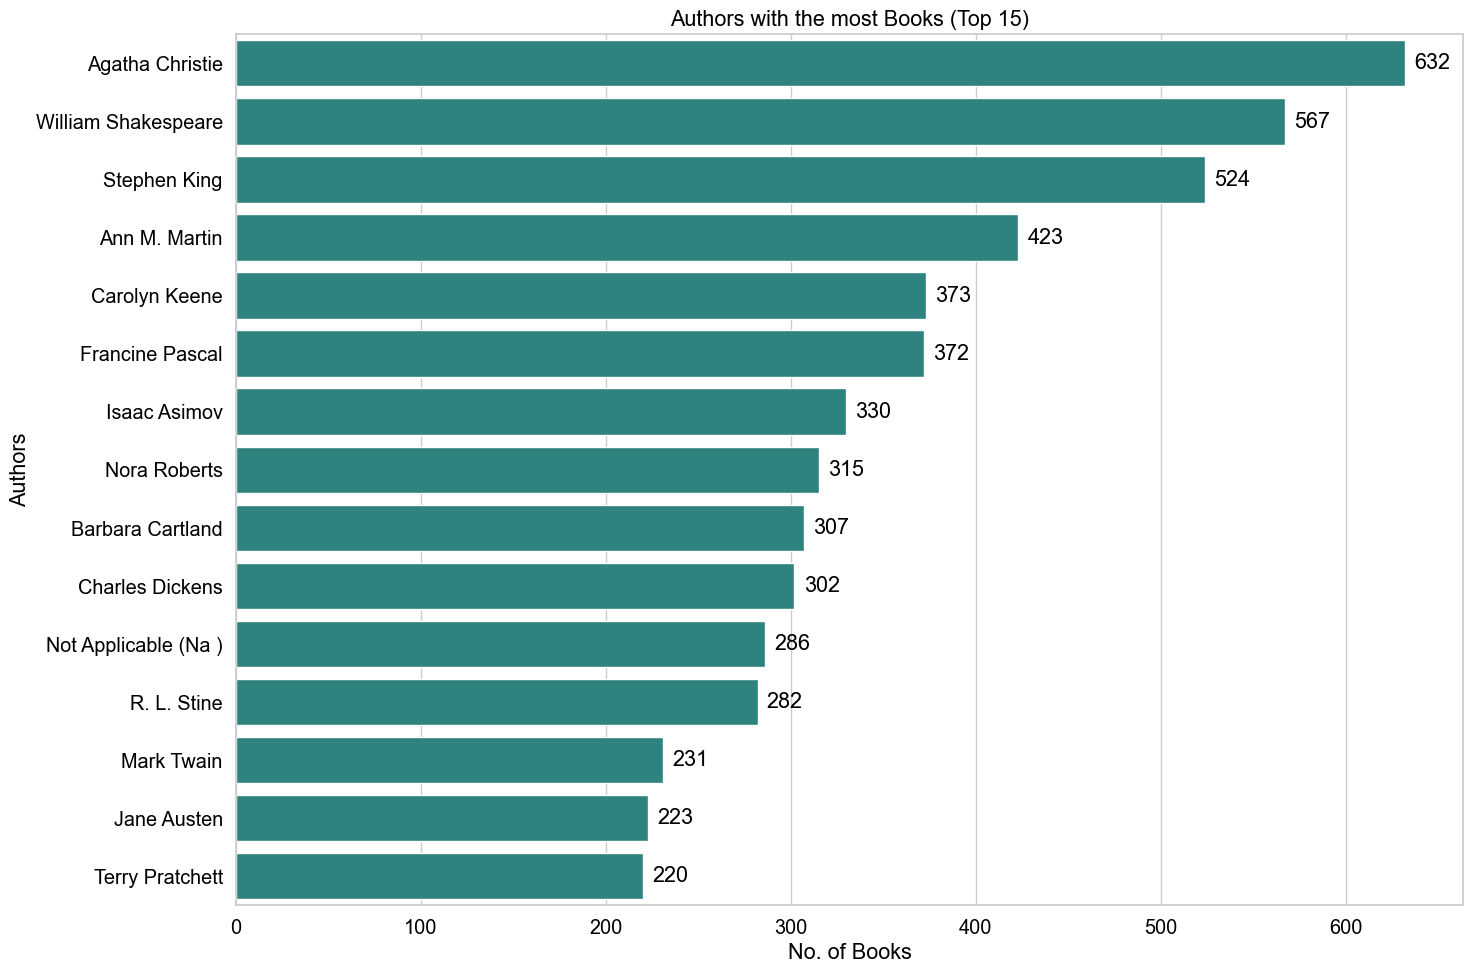

In [23]:
author = books['Book-Author'].value_counts()[:15]
plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1)
sns.barplot(x=author.values,y=author.index,ax=ax)
annotate_val_y(ax, gap=5)
plt.title('Authors with the most Books (Top 15)')
plt.xlabel('No. of Books')
plt.ylabel('Authors') 
plt.tight_layout(h_pad=2)

plt.show()

- The authors Agatha Christie, William Shakespeare, and Stephen King have written the most books in the dataset.
- These writers are clearly the most prolific authors, contributing a significant portion of the total book collection.

## Review Score

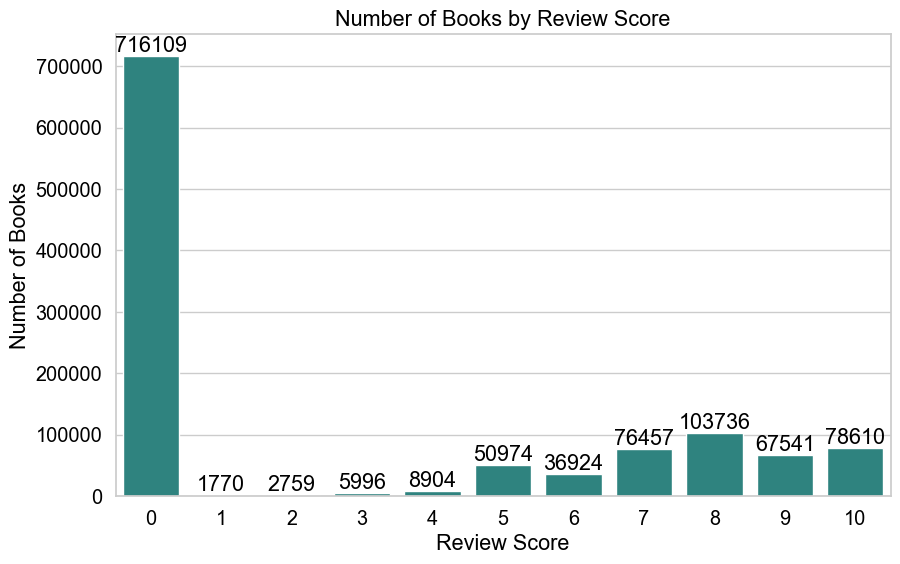

In [25]:
plt.figure(figsize=(10,6))
ax = plt.subplot(1,1,1)
sns.countplot(data = ratings, x='Book-Rating',ax=ax)
annotate_val(ax)
plt.xlabel("Review Score")
plt.ylabel("Number of Books")
plt.title("Number of Books by Review Score")

plt.show()

- About **68% of the books have a review count of 0**, indicating that most books were not reviewed by users.
- The **second highest review count observed is 8**.
- This suggests that **users either rarely review books** immediately or **choose not to review at all**, which is reflected in the dataset.

## Year with the Most Books Published

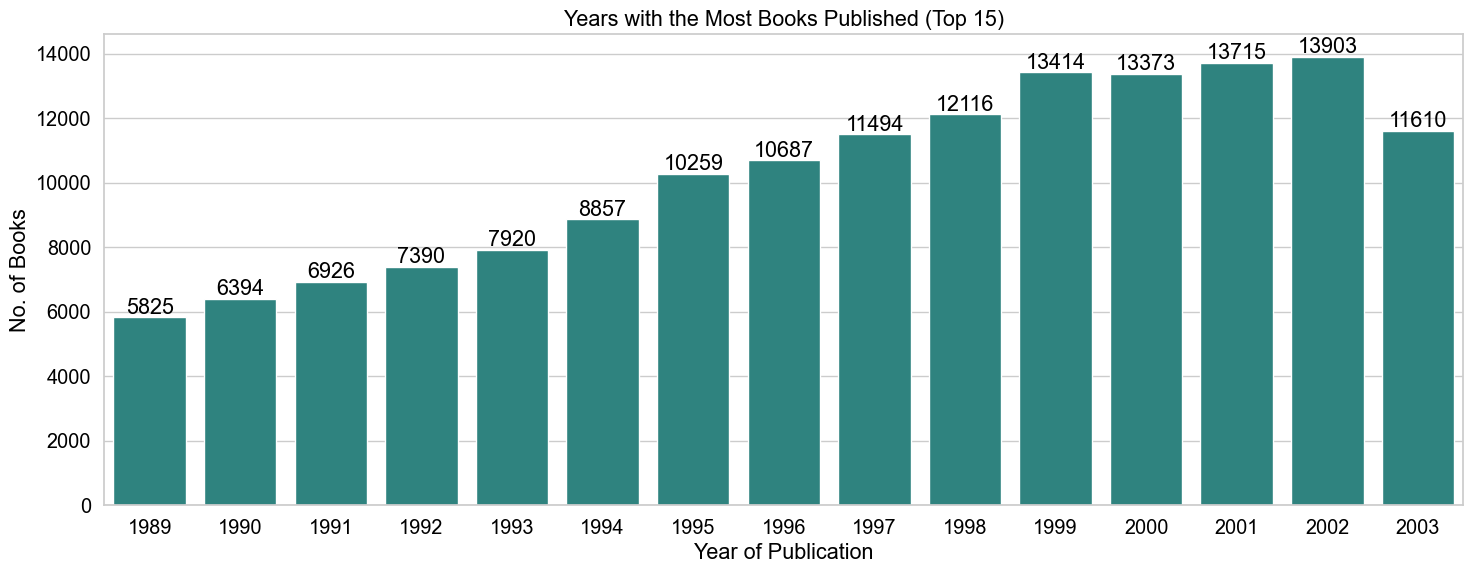

In [27]:

plt.figure(figsize=(15,6))
ax = plt.subplot(1,1,1)
years = books['Year-Of-Publication'].value_counts()[:15]
sns.barplot(x=years.index, y=years.values,ax=ax)
annotate_val(ax)
plt.title('Years with the Most Books Published (Top 15)')
plt.ylabel('No. of Books')
plt.xlabel('Year of Publication') 
plt.tight_layout(h_pad=2)

plt.show()

- Between **1989 and 2002**, the number of books published shows a steady **linear increase**.
- The **peak in publications occurred in 2002**, indicating the year with the most books released.
- This period coincides with a time when certain books became cultural sensations, similar to how popular technology products, like early mobile phones, captured widespread attention.

## Popularity based

In [21]:
rat_book = ratings.merge(books,on='ISBN')

In [22]:
num_ratings = rat_book.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_ratings.rename(columns={'Book-Rating' : 'num_rating'},inplace=True)

In [23]:
avg_ratings = rat_book.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_ratings.rename(columns={'Book-Rating' : 'avg_rating'},inplace=True)


In [24]:
popular_df = avg_ratings.merge(num_ratings,on='Book-Title')

In [25]:
popular_df = popular_df[popular_df['num_rating']>=250].sort_values('avg_rating',ascending=False).head(50)

In [26]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','avg_rating','num_rating','Book-Author','Publisher','Year-Of-Publication','Image-URL-M']]

In [228]:
popular_df

,Book-Title,avg_rating,num_rating,Book-Author,Publisher,Year-Of-Publication,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428,J. K. Rowling,Scholastic,1999,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),5.824289,387,J. K. Rowling,Scholastic,2000,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278,J. K. Rowling,Scholastic,1998,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347,J. K. Rowling,Scholastic,2003,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556,J. K. Rowling,Scholastic,2000,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281,J.R.R. TOLKIEN,Del Rey,1986,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368,J.R.R. TOLKIEN,Del Rey,1986,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,575,J. K. Rowling,Arthur A. Levine Books,1999,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260,J.R.R. TOLKIEN,Del Rey,1986,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,4.700000,510,Harper Lee,Little Brown &amp; Company,1988,http://images.amazon.com/images/P/0446310786.0...


## Collaborative 

In [28]:
x = rat_book.groupby('User-ID')['Book-Rating'].count() >200
user_index = list(x[x].index)

In [29]:
filter_rating = rat_book[rat_book['User-ID'].isin(user_index)]

In [30]:
y = filter_rating.groupby('Book-Title')['Book-Rating'].count() >= 50
book_index = y[y].index

In [31]:
filter_rating = filter_rating[filter_rating['Book-Title'].isin(book_index)]

In [32]:
pt = filter_rating.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating').fillna(0)

In [33]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
similarity = cosine_similarity(pt)

In [72]:
def recommend(book):
    idx = np.where(pt.index==book)[0][0]
    distance = similarity[idx]
    book_list = sorted(list(enumerate(distance)),reverse=True, key = lambda x: x[1])[1:6]

    data=[]
    for i in book_list :
        item =[]
        # print (pt.index[i[0]])
        temp_df = books[books['Book-Title']==pt.index[i[0]]].drop_duplicates('Book-Title')
        # print(temp_df)
        item.extend(temp_df['Book-Title'].values)
        item.extend(temp_df['Book-Author'].values)
        item.extend(temp_df['Image-URL-M'].values)

        data.append(item)
    return data

In [73]:
recommend("Harry Potter and the Chamber of Secrets (Book 2)")

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg']]

In [38]:
import pickle

In [39]:
pickle.dump(popular_df,open('popular.pkl','wb'))

In [75]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(similarity, open('similarity.pkl','wb'))
pickle.dump(books , open('book.pkl','wb'))